In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'bestsellers_with_categories.csv'
df = pd.read_csv(url)
print('Head:\n', df.head())
print('Shape:\n', df.shape)

Head:
                                                 Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
Shape:
 (550, 7)


Відповідь: 550. Про скільки книг зберігає дані датасет?

In [3]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

Відповідь: Чи є в якихось змінних пропуски? HI

In [4]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Відповідь: Які є унікальні жанри?
['Non Fiction', 'Fiction']

In [5]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')


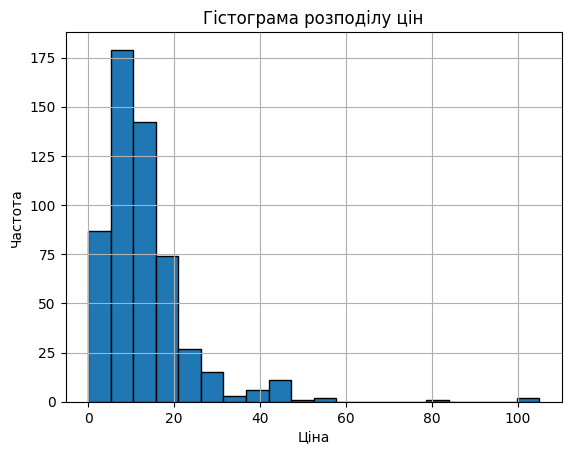

In [6]:
df['price'].hist(bins=20, edgecolor='black')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Гістограма розподілу цін')
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)


In [7]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9


In [8]:
df['user_rating'].max()

4.9

Відповідь: Скільки книг мають такий рейтинг? Відповідь:


In [9]:
books_with_maxrating = df[df['user_rating'] == df['user_rating'].max()]
count_books_with_maxrating = books_with_maxrating.shape[0]
count_books_with_maxrating

52

Відповідь: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing


In [10]:
df_reviews = df.loc[df['reviews'].idxmax()]
df_reviews

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object

Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:Publication Manual of the American Psychologic...


In [11]:
top_50_2015_by_rating = df[df['year'] == 2015].sort_values(by='user_rating', ascending=False).head(50)
most_expensive_book_in_2015 = top_50_2015_by_rating.loc[top_50_2015_by_rating['price'].idxmax()]
most_expensive_book_in_2015

name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object

Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20


In [12]:
top_50_2010_by_rating = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].sort_values(by='user_rating', ascending=False).head(50)
len(top_50_2010_by_rating)


20

Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [13]:
count_high_rated_books = len(df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))])
count_high_rated_books

1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).


In [14]:
sorted_rating_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
sorted_rating_2015

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам



In [15]:
genre_price_stats = df[['genre', 'price']].groupby('genre').agg(['min', 'max'])
genre_price_stats

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82

Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0 

Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105

Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0 

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні



In [16]:
author_book_count = df[['author', 'name']].groupby('author').agg('count')
author_book_count = author_book_count.rename(columns={'name': 'book_count'})
print(author_book_count)
author_with_most_books = author_book_count['book_count'].idxmax()
print(author_with_most_books)
print(author_book_count.loc[author_with_most_books, 'book_count'])

                            book_count
author                                
Abraham Verghese                     2
Adam Gasiewski                       1
Adam Mansbach                        1
Adir Levy                            1
Admiral William H. McRaven           1
...                                ...
Walter Isaacson                      3
William Davis                        2
William P. Young                     2
Wizards RPG Team                     3
Zhi Gang Sha                         2

[248 rows x 1 columns]
Jeff Kinney
12


Відповідь: Якої розмірності вийшла таблиця? Відповідь: 248 x 1

Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney

Відповідь: Скільки книг цього автора? Відповідь: 12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні



In [17]:
avg_rating = df[['author', 'user_rating']].groupby('author').agg('mean')
avg_rating = avg_rating.rename(columns={'user_rating': 'avg_rating'})
avg_rating

,avg_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


In [18]:
min_avg = avg_rating.min()
print(min_avg)
min_avg_author = avg_rating[avg_rating['avg_rating'] == 3.9]
min_avg_author

avg_rating    3.9
dtype: float64


,avg_rating
author,
Donna Tartt,3.9


Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну



In [19]:
result = pd.concat([avg_rating, author_book_count], axis=1)
result

,avg_rating,book_count
author,,
Abraham Verghese,4.600000,2
Adam Gasiewski,4.400000,1
Adam Mansbach,4.800000,1
Adir Levy,4.800000,1
Admiral William H. McRaven,4.700000,1
...,...,...
Walter Isaacson,4.566667,3
William Davis,4.400000,2
William P. Young,4.600000,2


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)



In [20]:
sorted_result = result.sort_values(by=['book_count', 'avg_rating'])
sorted_result

,avg_rating,book_count
author,,
Muriel Barbery,4.000000,1
Chris Cleave,4.100000,1
Ian K. Smith M.D.,4.100000,1
Pierre Dukan,4.100000,1
Elizabeth Strout,4.200000,1
...,...,...
American Psychological Association,4.500000,10
Suzanne Collins,4.663636,11
Gary Chapman,4.736364,11


Відповідь: Який автор перший у списку? Muriel Barbery

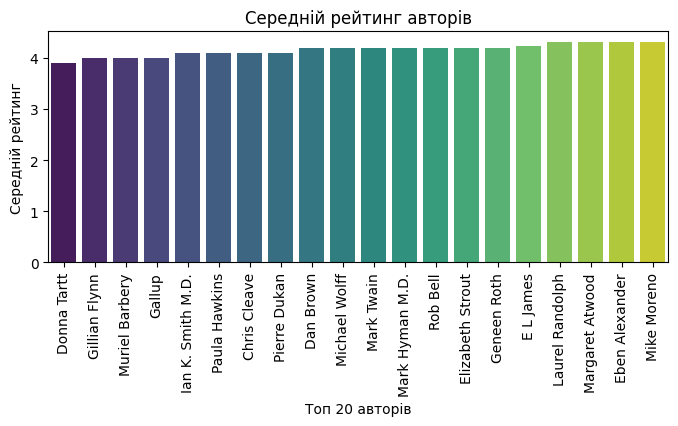

In [21]:
to_20_avg_rating = avg_rating.sort_values(by='avg_rating').head(20)
plt.figure(figsize=(8, 3))
sns.barplot(x='author', y='avg_rating', data=to_20_avg_rating, palette='viridis', hue='author', legend=False)
plt.title('Середній рейтинг авторів')
plt.xlabel('Топ 20 авторів')
plt.ylabel('Середній рейтинг')
plt.xticks(rotation=90)
plt.show()


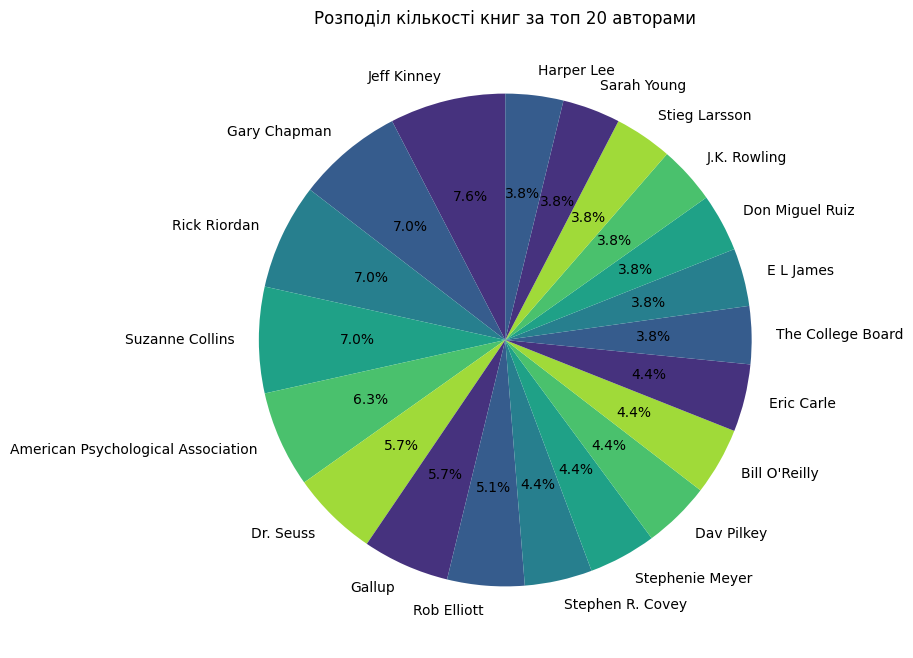

In [22]:
author_counts = df['author'].value_counts().head(20)

plt.figure(figsize=(12, 8))
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Розподіл кількості книг за топ 20 авторами')
plt.show()

#### 